In [1]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')
parameter = wnba['Games Played'].max()
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = sample.max()
sampling_error = parameter - statistic

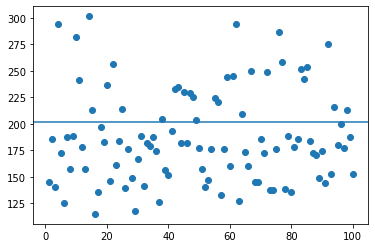

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

wnba = pd.read_csv('wnba.csv')
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)

In [ ]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sampling on each stratum
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)

In [ ]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

In [ ]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

In [ ]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')

variables = {'Name': '', 'Team': '', 'Pos': '', 'Height': '', 'BMI': '',
             'Birth_Place': '', 'Birthdate': '', 'Age': '', 'College': '', 'Experience': '',
             'Games Played': '', 'MIN': '', 'FGM': '', 'FGA': '',
             '3PA': '', 'FTM': '', 'FTA': '', 'FT%': '', 'OREB': '', 'DREB': '',
             'REB': '', 'AST': '', 'PTS': ''}
variables = {'Name': 'qualitative', 'Team': 'qualitative', 'Pos': 'qualitative',
             'Height': 'quantitative', 'BMI': 'quantitative',
             'Birth_Place': 'qualitative', 'Birthdate': 'quantitative', 'Age': 'quantitative', 
             'College': 'qualitative', 'Experience': 'quantitative', 'Games Played': 'quantitative',
             'MIN': 'quantitative', 'FGM': 'quantitative', 'FGA': 'quantitative',
             '3PA': 'quantitative', 'FTM': 'quantitative',
             'FTA': 'quantitative', 'FT%': 'quantitative', 'OREB': 'quantitative', 'DREB': 'quantitative',
             'REB': 'quantitative', 'AST': 'quantitative', 'PTS': 'quantitative'}

In [ ]:
nominal_scale = sorted(['Name', 'Team', 'Pos', 'Birth_Place', 'College'])
interval = ['Birthdate', 'Weight_deviation']
ratio = sorted(['Height', 'Weight', 'BMI', 'Age', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '15:00', 
                '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO',
                'PTS', 'DD2', 'TD3'])

In [ ]:
ratio_interval_only = {'Height':'', 'Weight': '', 'BMI': '', 'Age': '', 'Games Played': '', 'MIN': '', 'FGM': '',
                       'FGA': '', 'FG%': '', '3PA': '', '3P%': '', 'FTM': '', 'FTA': '', 'FT%': '',
                       'OREB': '', 'DREB': '', 'REB': '', 'AST': '', 'STL': '', 'BLK': '', 'TO': '',
                       'PTS': '', 'DD2': '', 'TD3': '', 'Weight_deviation': ''}
ratio_interval_only = {'Height': 'continuous', 'Weight': 'continuous', 'BMI': 'continuous', 'Age': 'continuous',
                       'Games Played': 'discrete', 'MIN': 'continuous', 'FGM': 'discrete',
                       'FGA': 'discrete', 'FG%': 'continuous', '3PA': 'discrete', '3P%': 'continuous',
                       'FTM': 'discrete', 'FTA': 'discrete', 'FT%': 'continuous', 'OREB': 'discrete',
                       'DREB': 'discrete', 'REB': 'discrete', 'AST': 'discrete', 'STL': 'discrete',
                       'BLK': 'discrete', 'TO': 'discrete', 'PTS': 'discrete', 'DD2': 'discrete', 
                       'TD3': 'discrete', 'Weight_deviation': 'continuous'}

In [ ]:
bmi = {21.201: [],
 21.329: [],
 23.875: [],
 24.543: [],
 25.469: []}
bmi = {21.201: [21.2005, 21.2015],
 21.329: [21.3285, 21.3295],
 23.875: [23.8745, 23.8755],
 24.543: [24.5425, 24.5435],
 25.469: [25.4685, 25.4695]}

In [ ]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

freq_distro_pos = wnba['Pos'].value_counts()
freq_distro_height = wnba['Height'].value_counts()

age_ascending = wnba['Age'].value_counts().sort_index()
age_descending = wnba['Age'].value_counts().sort_index(ascending = False)

In [ ]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

# Type your answer below
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]

In [ ]:
percentages = wnba['Age'].value_counts(normalize = True).sort_index() * 100
proportion_25 = percentages[25] / 100
percentage_30 = percentages[30]
percentage_over_30 = percentages.loc[30:].sum()
percentage_below_23 = percentages.loc[:23].sum()

In [ ]:
from scipy.stats import percentileofscore
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 17, kind = 'weak')
percentage_half_more = 100 - percentile_rank_half_less

In [ ]:
percentiles = wnba['Age'].describe(percentiles = [.5, .75, .95])
age_upper_quartile = percentiles['75%']
age_middle_quartile = percentiles['50%']
age_95th_percentile = percentiles['95%']


In [ ]:
grouped_freq_table = wnba['PTS'].value_counts(bins = 10,
                normalize = True).sort_index(ascending = False) * 100

In [ ]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0 for _ in range(10)], index = intervals)

for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break

<AxesSubplot:>

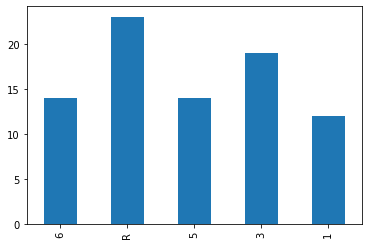

In [6]:
wnba['Experience'].value_counts().iloc[[3,0,2,1,4]].plot.bar()

In [ ]:
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.barh(
    title = 'Number of players in WNBA by level of experience')
wnba['Exp_ordinal'].value_counts().plot.pie()
wnba['Exp_ordinal'].value_counts().plot.pie(figsize = (6,6), autopct = '%.2f%%',
                                    title = 'Percentage of players in WNBA by level of experience')
plt.ylabel('')

In [ ]:
wnba['PTS'].plot.hist()

In [ ]:
wnba['Games Played'].plot.hist()

In [ ]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8,
                               title = 'The distribution of players by games played')
plt.xlabel('Games played')

In [ ]:
assists_distro = 'right skewed'
ft_percent_distro = 'left skewed'
normal_distribution = 'Height'

In [ ]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro, '\n\n', little_xp_distro, '\n\n', experienced_distro, '\n\n',
      very_xp_distro, '\n\n', veteran_distro)

In [ ]:
import seaborn as sns
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba,
              order = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'],
              hue_order = ['C', 'F', 'F/C', 'G', 'G/F']
             )

In [ ]:
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)
result = 'rejection'

In [ ]:
import matplotlib.pyplot as plt
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

In [ ]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

'''We can still observe that most of the old players that belong to the "average or above"
category play significantly more than average. With the help of the vertical line, the pattern
is very easy to notice. Because the graph looks much cleaner than the one with step-type
histograms, we can easily argue that the pattern is much more obvious in the case of kernel density
plots.'''

In [ ]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)
plt.show()

'''The patterns we see are strikingly similar to those we saw for heights. This can be easily
explained by the fact that there's a strong positive relation between a player's height and her
weight: the taller the player, the heavier she is; the shorter the player, the lighter she is.'''

In [ ]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)
plt.show()

In [ ]:
iqr = 29 - 22
lower_bound = 22 - (1.5 * iqr)
upper_bound = 29 + (1.5 * iqr)
outliers_low = sum(wnba['Games Played'] < lower_bound) # True values will count as 1 in the summation
outliers_high = sum(wnba['Games Played'] > upper_bound)

sns.boxplot(wnba['Games Played'])
plt.show()

In [ ]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

In [ ]:
after.head(3)

In [ ]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

In [ ]:
fandango_after.head(3)

In [ ]:
fandango_after.sample(10, random_state = 1)

In [ ]:
sum(fandango_previous['Fandango_votes'] < 30)

In [ ]:
fandango_previous.head(2)

In [ ]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

In [ ]:
fandango_previous['Year'].value_counts()

In [ ]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

In [ ]:
fandango_after.head(2)

In [ ]:
fandango_after['year'].value_counts()

In [ ]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [ ]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

In [ ]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

In [ ]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

In [ ]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [ ]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]